# Code Setup

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import utils_aruco
import utils_icp
import copy
from utils_data_process import *
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.image as mpimg
import characterization
# from scipy.optimize import curve_fit

figures_dir = 'C:/Users/harry/Desktop/research_sync/IROS 2024/figures'
# plt.rcParams['mathtext.fontset'] = 'custom'

plt.rcParams['mathtext.default'] = 'regular'  # Use regular text for mathtext by default
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:bold'

# Optionally, you can also set the default font family to Arial for consistency
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
fontsize_main = 20
fontsize_legend = 14
# import sys
# import importlib
# importlib.reload(sys.modules['utils_data_process'])
plt.rcParams['font.size'] = fontsize_main
from IPython.display import display


In [3]:
fig_all, ax_all = plt.subplots(3,3,figsize=(14,12),gridspec_kw={'wspace': 0.3, 'hspace': 0.2})
plt.close(fig_all)

# *Exp 2-1-single

In [4]:
data_folder = './data-raw'

result_name_arr = [
    
    'hello_20240809_13-34-53',
]

tag_offset_dict = {
    # 1: {
    #     'rot': -180,
    #     'disp': [3.25,-3.25]
    # }
}
ids=[4, 2, 3, 17, 10, 5]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                           tag_offset_dict=tag_offset_dict)

found prior buffer, loading from ./data-raw/hello_20240809_13-34-53/processed/load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw/hello_20240809_13-34-53/processed/frame_1.png. Skipping...
Error: Could not read frame 1000 from the video.
loaded keys:  ['camera_2', 'camera_4', 'camera_5', 'camera_10', 'camera_17', 'camera_3', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'regulator_PWM9', 'regulator_PWM10', 'regulator_PWM11', 'regulator_PWM12', 'info_CYCLE_DONE']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


In [5]:
result_folder = os.path.join(data_folder, result_name_arr[0])
values_dict, times_dict, camera_dict = load_data(result_folder, use_buffer=True)
#print(values_dict)
camera_time = times_dict['camera_time']
#print(camera_time)
print(camera_dict["ids"][0])

found prior buffer, loading from ./data-raw/hello_20240809_13-34-53/processed/load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
[ 2  4  5 10 17  3]


In [6]:
cur_corners = camera_dict['corners'][0]
corners_by_id = camera_dict['corners_by_id'][0]
display(cur_corners)
display(corners_by_id)

array([[[772., 210.],
        [758., 187.],
        [781., 173.],
        [795., 197.]],

       [[718.,  51.],
        [706.,  21.],
        [734.,   9.],
        [746.,  39.]],

       [[958., 590.],
        [978., 572.],
        [998., 594.],
        [976., 613.]],

       [[937., 514.],
        [918., 533.],
        [901., 513.],
        [921., 494.]],

       [[848., 405.],
        [873., 396.],
        [882., 421.],
        [857., 430.]],

       [[800., 292.],
        [823., 280.],
        [833., 304.],
        [810., 315.]]], dtype=float32)

{2: array([[772., 210.],
        [758., 187.],
        [781., 173.],
        [795., 197.]], dtype=float32),
 4: array([[718.,  51.],
        [706.,  21.],
        [734.,   9.],
        [746.,  39.]], dtype=float32),
 5: array([[958., 590.],
        [978., 572.],
        [998., 594.],
        [976., 613.]], dtype=float32),
 10: array([[937., 514.],
        [918., 533.],
        [901., 513.],
        [921., 494.]], dtype=float32),
 17: array([[848., 405.],
        [873., 396.],
        [882., 421.],
        [857., 430.]], dtype=float32),
 3: array([[800., 292.],
        [823., 280.],
        [833., 304.],
        [810., 315.]], dtype=float32)}

In [74]:
#display(values_dict)
r_val = merge_PWM(values_dict['regulator_PWM3'], values_dict['regulator_PWM4'])
r_time = times_dict['regulator_PWM3']
display(r_val)
display(r_time)


array([  0,  10, -10])

array([13.23590899, 28.23676324, 43.23825359])

In [8]:
#print(camera_data_dict_arr[0])
#camera_data_dict_arr[0]['t'][2]
#ax.scatter(camera_data_dict_arr[0]['t'][2], camera_data_dict_arr[0]['rot'][2], s=0.1)
#ax.plot(camera_data_dict_arr[0]['t'][5], camera_data_dict_arr[0]['rot'][5], linestyle='-')
#ax1.plot(r_time, r_val)
# camera_data_dict_arr[0]['t'][2]
angleDict = {}
for i in range(len(camera_dict["corners"])):
    corners = camera_dict["corners"][i]
    ids = [[id] for id in camera_dict["ids"][i]]
    angleArr = characterization.calcAngleCorners(corners, ids)
    for j in range(len(angleArr)):
        if j not in angleDict:
            angleDict[j] = np.array([])
        angleDict[j] = np.append(angleDict[j], angleArr[j])

#print(angleDict[1])


    

Text(0, 0.5, 'angle (Deg)')

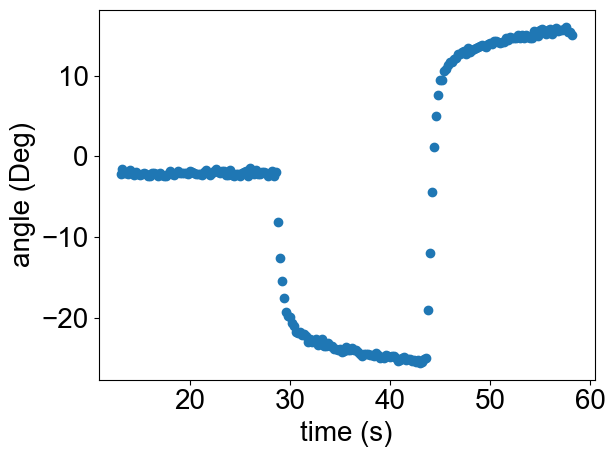

In [13]:
fig, ax1 = plt.subplots()
ax1.scatter(camera_time, angleDict[1])
plt.xlabel("time (s)")
plt.ylabel("angle (Deg)")

n cycle 1 cycle len 3
2 152


[{'disp': {2: array([[776.  , 191.25],
          [776.  , 191.5 ],
          [776.25, 191.25],
          [776.25, 191.25],
          [776.25, 191.25],
          [776.  , 191.5 ],
          [776.25, 191.25],
          [776.5 , 191.  ],
          [776.  , 191.  ],
          [776.25, 191.5 ],
          [776.  , 191.25],
          [776.25, 191.25],
          [776.  , 191.25],
          [776.25, 191.  ],
          [776.5 , 191.  ],
          [776.5 , 190.75],
          [776.  , 191.25],
          [776.  , 191.25],
          [776.  , 191.25],
          [776.25, 191.  ],
          [776.  , 191.  ],
          [776.  , 191.  ],
          [776.25, 191.5 ],
          [776.25, 191.25],
          [776.  , 191.25],
          [776.25, 191.5 ],
          [776.  , 191.25],
          [776.  , 191.25],
          [776.  , 191.25],
          [776.  , 191.5 ],
          [776.  , 191.  ],
          [776.  , 191.25],
          [776.  , 191.75],
          [775.75, 191.25],
          [775.75, 191.25],
         

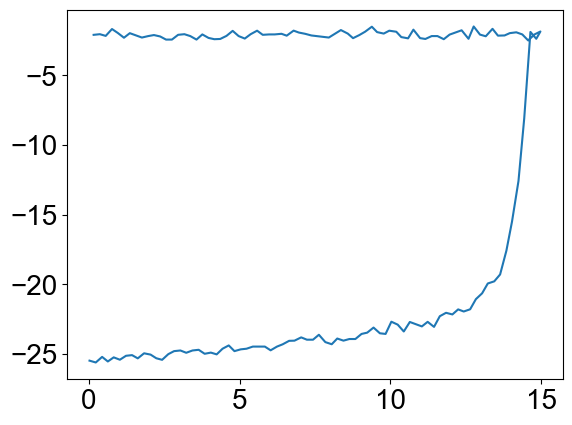

In [35]:
prep_cycle(1, camera_data_dict_arr[0], r_val, r_time)
#print(camera_data_dict_arr[0]["angle_wrt_fixed"])
start_idx = camera_data_dict_arr[0]['cycle_start_idx'][2][0]
end_idx = camera_data_dict_arr[0]['cycle_start_idx'][2][1]
print(start_idx, end_idx)
fig, ax2 = plt.subplots()
ax2.plot(camera_data_dict_arr[0]['t_cycle'][2][start_idx:end_idx],(angleDict[1][start_idx:end_idx]))
camera_data_dict_arr

In [96]:
r_time, r_val
# want to reorder by regulator value in r_val
# data ranges from 0->r_time[0], r_time[0]->r_time[1] ect
#seperate data based on time into buckets, and then merge together
#print(r_time)
r_val_index = np.array([])
for i in range(len(r_val)):
    r_val_index = np.append(r_val_index, np.where(np.logical_and(times_dict_arr[0]["camera_2"] <= r_time[i] + 0.1, times_dict_arr[0]["camera_2"] >= r_time[i] - 0.1)))
r_val_index = np.append(r_val_index, len(times_dict_arr[0]["camera_2"]) - 1)
angle_segmented = []
#display(r_val_index)
for i in range(len(r_val_index) - 1):
    angle_segmented.append(angleDict[1][int(r_val_index[i]):int(r_val_index[i+1])])
ind = np.argsort(r_val)
sorted_angles = np.array([])
for i in ind:
    sorted_angles = np.append(sorted_angles, angle_segmented[i])
sorted_angles

array([-25.48100916, -25.08878022, -24.97624782, -19.01162441,
       -12.01260385,  -4.39333721,   1.18328433,   4.99468656,
         7.59704989,   9.42013255,   9.51696767,  10.56895007,
        10.82178541,  11.39379591,  11.77475963,  11.65711753,
        12.07859877,  12.17877037,  12.70306961,  12.70306961,
        12.92817052,  13.08435597,  12.76726317,  13.44277404,
        13.01327494,  13.14969341,  13.28180062,  13.51128157,
        13.62411785,  13.71847176,  13.83167216,  13.64398466,
        13.62512116,  13.94157076,  14.12219598,  13.88986195,
        14.31645225,  14.30265746,  14.21813892,  14.09866502,
        14.23270465,  14.16160912,  14.65960877,  14.46002009,
        14.76959097,  14.70396768,  14.73838029,  14.63637018,
        15.02807947,  14.63637018,  15.01234595,  14.70091101,
        15.04516344,  14.7987215 ,  14.63291653,  14.75003843,
        15.50389641,  15.38691948,  14.95882442,  15.68226405,
        15.83081942,  15.4837481 ,  15.20534246,  15.68

In [88]:
# now do time array
display(r_val_index, r_val)
# for i in range(len(r_val_index) - 1):
lens = np.array([len(angles) for angles in angle_segmented])
sorted_lens = lens[ind]
#sorted_lens
sorted_r_val = np.sort(r_val)
x_vals = np.array([])
print(len(sorted_r_val))
print(len(sorted_lens))
# for i in range(len(sorted_r_val) - 1):
#     x_vals = np.append(x_vals, np.linspace(sorted_r_val[i], sorted_r_val[i + 1], sorted_lens[i]))
# len(x_vals)
x_vals = np.linspace(np.min(r_val), np.max(r_val), len(sorted_angles))

array([  1.,  76., 151., 227.])

array([  0,  10, -10])

3
3


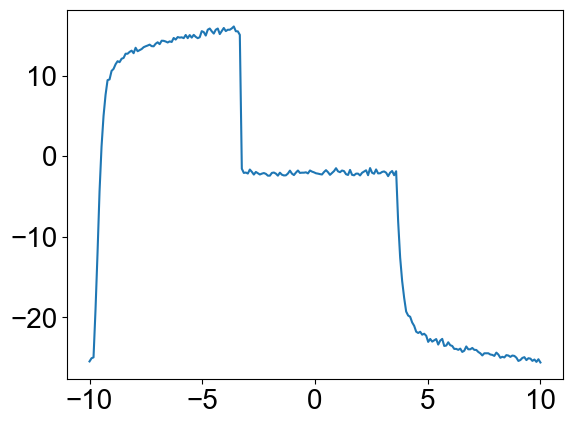

In [89]:
fig, ax = plt.subplots()
ax.plot(x_vals, sorted_angles)
# print(len(sorted_angles))
# len(angleDict[1])

Text(0, 0.5, 'angle')

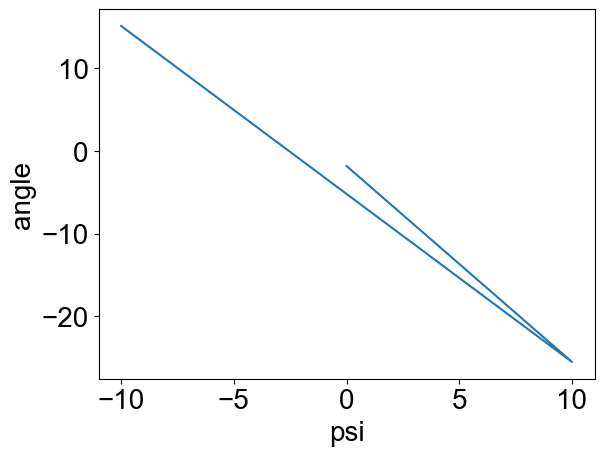

In [99]:
r_val_index
fig, ax = plt.subplots()
ax.plot(r_val, angleDict[1][r_val_index.astype(int)][1:])
plt.xlabel("psi")
plt.ylabel("angle")

AxisError: axis 0 is out of bounds for array of dimension 0

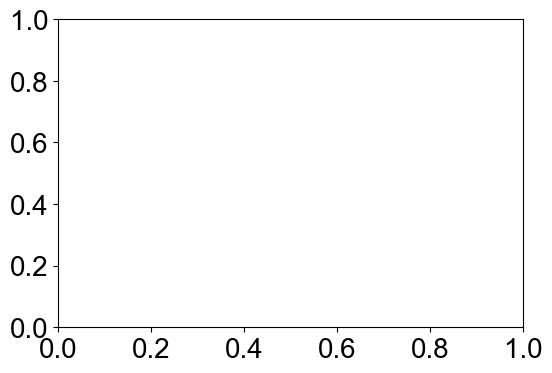

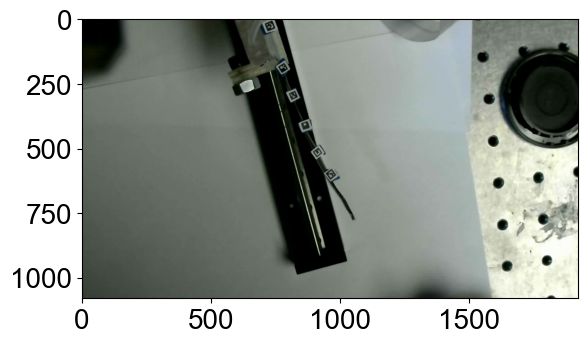

In [68]:

n_cycle = 10
base_angle = 85.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
# fig, ax_angle = plt.subplots(2, 1, figsize=(4,8), sharey='row',gridspec_kw={'wspace': 0.14, 'hspace': 0.4})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[0], 'processed', 'frame_1.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
   
    print(calc_angle_wrt_horiz(camera_data_dict['corners']))

    print(calc_angle_wrt_horiz(camera_data_dict['corners'][1][0]))    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    angles[angles < -1.5] += 2 * np.pi
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360

    print('angles', np.rad2deg(np.min(angles)), np.rad2deg(np.max(angles)))
    
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_all[0][0]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]


        
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
                -1 * (camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle), 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        # print('minmax plot angle', np.min(-1 * (camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle)), 
             # np.max(-1 * (camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle)))
        if ii == len(result_name_arr) - 1:
            lines.append(line)

        ax = ax_all[0][1]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            (camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[1], 
            camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc,#-base_disp[0], 
            
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles), flip_x=False))


    # ax.legend()
print(lines)
for i, ax in enumerate([ax_all[0][0]]):
    # ax.set_ylim(-110, 110)
    ax.set_yticks([0, 25,50,75,100,125])
    ax.set_yticklabels(['0', '', '50', '','100',''])
    ax.set_xlim(-10, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['0', '', '86', '', '172'])
    
    # ax.set_title(f'{psi[i]} kPa', fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)', )
        # ax.set_xlabel('Pressure (kPa)', )
    # if i == 0:
    #     legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
    #     legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
    #     legend = ax.legend(legend_handles, legend_labels, ncol=1, 
    #                        labelspacing=0.1, 
    #                        columnspacing =0.05,
    #                        loc='lower right', 
    #                        handletextpad=0.1, 
    #                        fontsize=fontsize_legend
    #                       )

for i, ax in enumerate([ax_all[0][1]]):
    ax.axis('equal')
    ax.set_xlim(-6, 6)
    ax.set_xticks([-5, -2.5, 0, 2.5, 5])
    ax.set_xticklabels([ '-5', '', '0', '', '5', ])
    ax.set_ylim(0, 5)
    ax.set_yticks([0, 2.5, 5])
    ax.set_yticklabels(['0', '', '5'])
    
    # ax.set_aspect('equal')
    if i == 0:
        ax.set_ylabel('Displacement-Y (mm)')
    if i == 0:
        ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
    # if i == 0:
        # ax.set_xlabel('Displacement-X (mm)')

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

# plt.savefig(os.path.join(figures_dir, 'onedir-diamond-cont.pdf'), dpi=600)
display(fig_all)

# *Exp 2-3-single

In [8]:
result_name_arr = [
    'exp_2_3_20240520_16-48-49_onedir-diamond'
    
]

n_cycle_arr = [10, 10]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids)

found prior buffer, loading from ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_2_3_20240520_16-48-49_onedir-diamond\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_17']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])


n cycle 10 cycle len 2


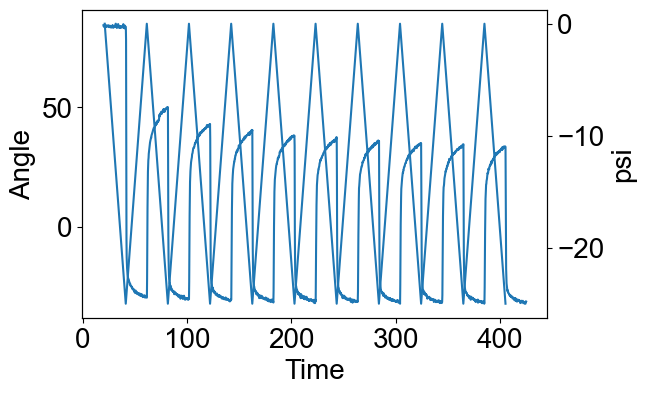

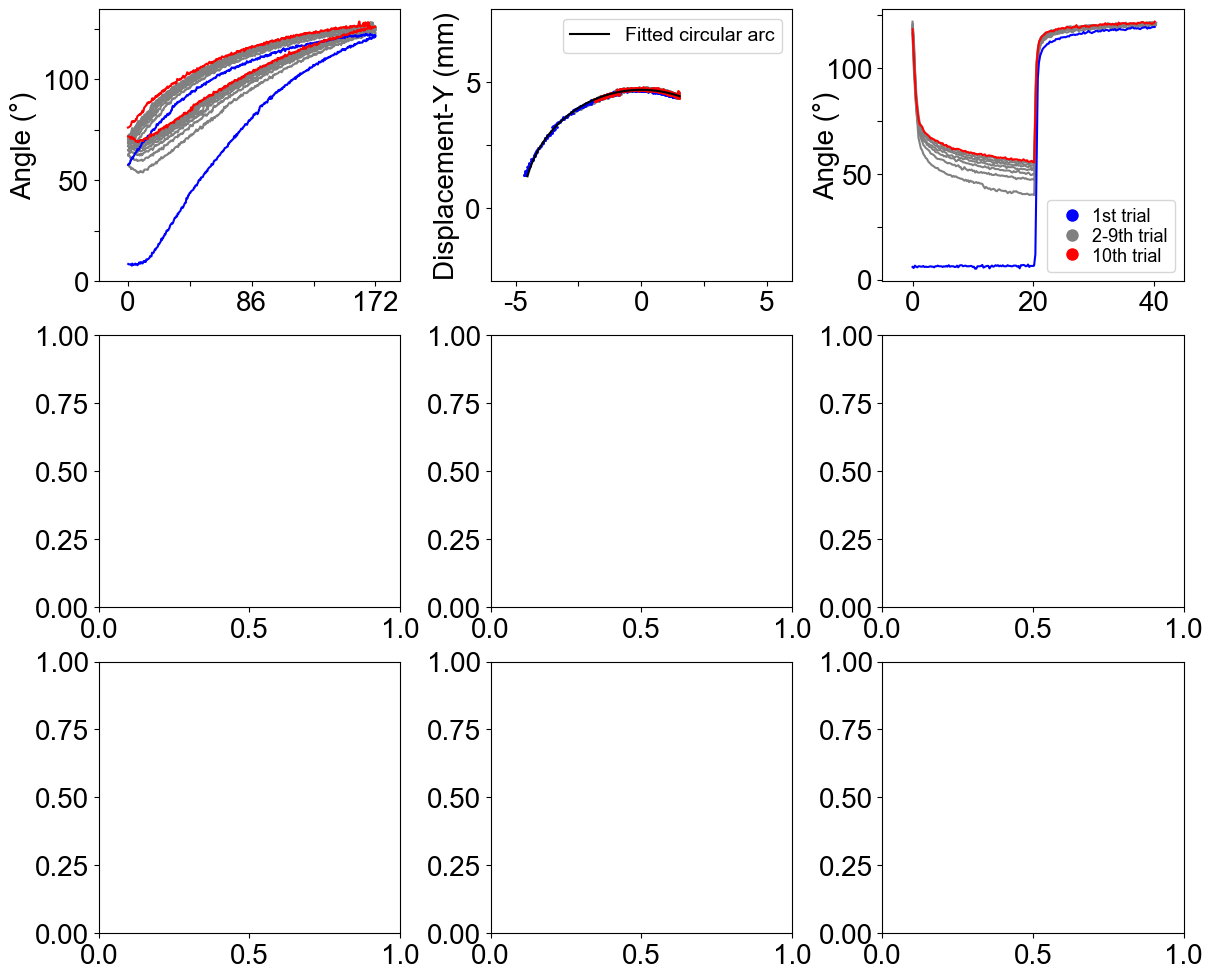

hello


In [9]:
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
# fig, ax_angle = plt.subplots(1, 1, figsize=(4,4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
lines = []
for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_all[0][2]
    # ax1 = axes[1]
    legend_labels = []
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360
    
    for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-2:
            color = 'red'
        else:
            color = 'grey'
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        
        # if i != 1:
        #     continue
        cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
        cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]
        cur_angle = -cur_angle+90
        
        lines.append(ax.plot(cur_t, 
                cur_angle, 
                linestyle='-',
                label=f'Trial {i+1}',
                color=color
                ))
        # ax1.scatter(i, camera_data_dict['rot'][1][(start_idx+end_idx)//2]-90)
        # if i == 1:
            # break
        # if i == n_cycle-2:
            # break
 

for i, ax in enumerate([ax_all[0][2]]):

    ax.set_yticks([0, 25,50,75,100,125])
    ax.set_yticklabels(['0', '', '50', '','100',''])
    ax.set_xlim(-5, 45)
    ax.set_xticks([0, 20, 40])
    
    # ax.set_title(subtitles[i], fontsize='24')
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))
    if i == 0:
        ax.set_ylabel('Angle (°)',labelpad=-10)
        # ax.set_xlabel('Time (s)')

    if i == 0:
        legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
        legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
        legend = ax.legend(legend_handles, legend_labels, ncol=1, 
                           labelspacing=0.1, 
                           columnspacing =0.05,
                           loc='lower right', 
                           handletextpad=0.1, 
                           fontsize=fontsize_legend-1
                          )
# plt.savefig(os.path.join(figures_dir, 'onedir-diamond-step.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()
display(fig_all)
print('hello')

# *Exp 3-1-single 

In [13]:

result_name_arr = [
    # 'exp_3_1_single_20240325_09-37-24_single_backbone_0',
    # 'exp_3_1_single_20240325_10-34-13_single_backbone_10',
    # 'exp_3_1_single_20240325_12-57-31_single_backbone_10',
    # 'exp_3_1_single_20240325_13-52-29_single_backbone_20'
    # 'exp_3_1_single_20240325_14-54-47_single_backbone_20' # another run with different initial conditions
    # 'exp_3_1_single_20240325_11-53-28_single_backbone_20'

    # 'exp_3_1_single_20240519_14-10-41_bidir-single' # new design of actuators
    'exp_3_1_single_20240519_20-10-24_bidir-single',
    'exp_3_1_single_20240519_15-25-01_bidir-twopouch'
]

tag_offset_dict = {
    1: {
        'rot': -180,
        'disp': [3.25,-3.25]
    }
}
ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, 
                                                                                                           result_name_arr, 
                                                                                                           ids,
                                                                                                           tag_offset_dict=tag_offset_dict)

FileNotFoundError: [Errno 2] No such file or directory: './data-raw/exp_3_1_single_20240519_20-10-24_bidir-single/queue.pickle'

FileNotFoundError: [Errno 2] No such file or directory: './data-raw/exp_3_1_single_20240519_15-25-01_bidir-twopouch/processed/frame_1000.png'

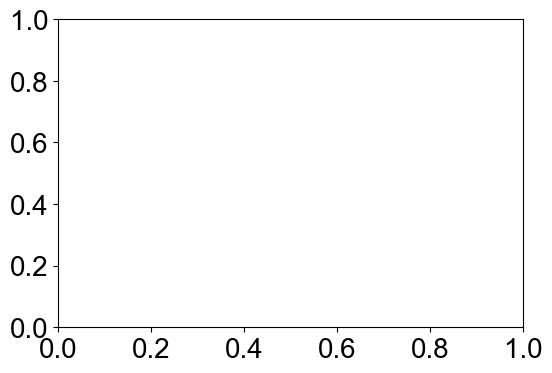

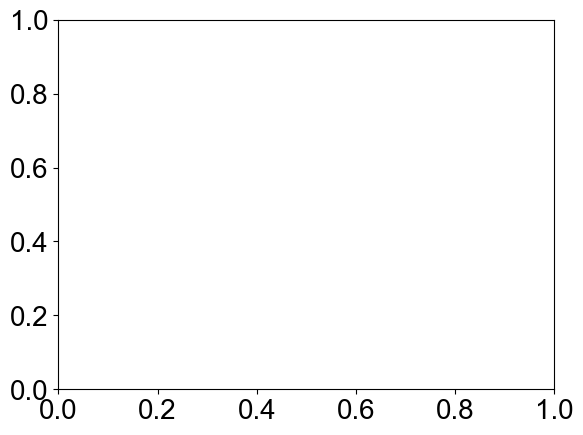

In [14]:
plt.rcParams['font.size'] = fontsize_main
n_cycle = 10
base_angle = 90.

lines = []
lines_circle = []
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
fig, ax_img = plt.subplots()
# fig, ax_angle = plt.subplots(2, 2, figsize=(8,8), sharey='row',gridspec_kw={'wspace': 0.14, 'hspace': 0.2})

img = mpimg.imread(os.path.join(data_folder, result_name_arr[1], 'processed', 'frame_1000.png'))
ax_img.imshow(img)

for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    # all_keys = ['t', 'rot', 'disp', 'centroid', 'angle_wrt_fixed']
    # for key in all_keys:
    #     if 2 in camera_data_dict[key]:
    #         camera_data_dict[key][1] = camera_data_dict[key][2]  
    print(calc_angle_wrt_horiz(camera_data_dict['corners']))
    print(calc_angle_wrt_horiz(camera_data_dict['corners'][1][0]))    
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    ax = ax_ori
    ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['rot'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')

    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_img
    ax.scatter(
            camera_data_dict['centroid'][1][:, 0], 
            camera_data_dict['centroid'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    ax.scatter(
            camera_data_dict['centroid_offset'][1][:, 0], 
            camera_data_dict['centroid_offset'][1][:, 1], 
            linestyle='-',
            # label=f'Trial {i+1}',
            s=1
        )
    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['centroid'][1][:, :2])
    ax.scatter([xc], [yc], s=2)

    xc, yc, r, sigma, angles = circle_fit(camera_data_dict['disp_offset'][1][:, :2]*camera_scale[0])
    # lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles)))
    # ax.scatter([xc]/camera_scale[0], [yc]/camera_scale[0], s=1, color='red')

    angles[angles < -1.5] += 2 * np.pi
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360
    # print('angles', np.min(angles), np.max(angles))
    
    for i in list(range(1, n_cycle-1))+[0, n_cycle-1] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-1:
            color = 'red'
        else:
            color = 'grey'
            
        ax = ax_all[ii+1][0]    
        # if i != 0:
            # continue
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        print('angles', np.min( camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle), 
              np.max( camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle, ))
        
        line = ax.plot(camera_data_dict['t_cycle'][1][start_idx:end_idx], 
                camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-base_angle, 
                linestyle='-',
                label=f'#{i+1}',
                color=color
                )
        
        if ii == len(result_name_arr) - 1:
            lines.append(line)

        ax = ax_all[ii+1][1]
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        ax.scatter(
            -1 * (camera_data_dict['disp_offset'][1][start_idx:end_idx, 1]*camera_scale[0]-yc),#-base_disp[0], 
            -1*(camera_data_dict['disp_offset'][1][start_idx:end_idx, 0]*camera_scale[0]-xc),#-base_disp[1], 
            linestyle='-',
            label=f'Trial {i+1}',
            s=1,
            color=color
        )
    lines_circle.append(plot_circle_arc(ax, np.array([0, 0]), r, np.min(angles), np.max(angles), flip_xy=True, flip_x=True))


    # ax.legend()
print(lines)
subtitle = ['Single pouch', 'Double pouch']
for i, ax in enumerate([ax_all[1][0],ax_all[2][0]]):
    ax.set_ylim(-130, 110)
    ax.set_yticks([-100, -50, 0, 50,100])
    ax.set_xlim(-20, np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])*1.1)
    #map tmime to pressure
    ax.set_xticks([map_range(tmp, -25, 25, 
                             np.min(camera_data_dict['t_cycle'][1][start_idx:end_idx]), 
                             np.max(camera_data_dict['t_cycle'][1][start_idx:end_idx])) for tmp in [-25, -12.5, 0, 12.5, 25]])
    ax.set_xticklabels(['(172,0)', '', '(0,0)', '', '(0,172)'])
    if i == 1:
        ax.set_xlabel('Pressure (kPa)', )
    
    # ax.set_title(subtitle[i], fontsize=fontsize_main)
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

    ax.set_ylabel('Angle (°)', labelpad=-10)
  

    # if i == 2:
    #     legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
    #     legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
    #     legend = ax.legend(legend_handles, legend_labels, ncol=1, 
    #                        labelspacing=0.1, 
    #                        columnspacing =0.05,
    #                        loc='upper right', 
    #                        handletextpad=0.1, 
    #                        fontsize=fontsize_legend,
    #                       )

for i, ax in enumerate([ax_all[1][1],ax_all[2][1]]):
    ax.axis('equal')
    ax.set_xlim(-6, 6)
    ax.set_xticks([-5, -2.5, 0, 2.5, 5])
    ax.set_xticklabels(['-5', '', '0', '', '5'])
    ax.set_ylim(-3.5, 8.5)
    ax.set_yticks([0, 2.5, 5])
    ax.set_yticklabels(['0', '', '5',])
    
    # ax.set_aspect('equal')
    ax.set_ylabel('Displacement-Y (mm)', )
    # if i == 2:
        # ax.legend(handles=[lines_circle[i][0]], labels=['Fitted circular arc'], fontsize=fontsize_legend,)
    if i == 1:
        ax.set_xlabel('Displacement-X (mm)', )

# fig.text(0.06, 0.5, , va='center', rotation='vertical')
# plt.tight_layout()

# plt.savefig(os.path.join(figures_dir, 'bidir-single-cont.pdf'), dpi=600)
plt.show()
display(fig_all)

# *Exp 3-3-1 (single bidir actuator actuation)

In [12]:
result_name_arr = [
    # 'exp_3_3_single_20240325_17-54-28_timeout_20_backbone_0',
    # 'exp_3_3_single_20240325_18-22-31_timeout_20_backbone_10',
    # 'exp_3_3_single_20240325_18-28-35_timeout_20_backbone_20'
    # 'exp_3_3_single_20240519_21-08-15_bidir-single',
   
    
    'exp_3_3_single_20240520_16-28-43_bidir-single', # 10 trials
    # 'exp_3_3_single_20240520_17-45-12_bidir-twopouch',
    'exp_3_3_single_20240520_18-06-50_bidir-twopouch',
    # 'exp_2_3_20240520_16-48-49_onedir-diamond'
    
]

n_cycle_arr = [10, 10]

ids=[0, 1, 2]
values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr = multi_data_prep(data_folder, result_name_arr, ids)

found prior buffer, loading from ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\frame_1.png. Skipping...
Image already exists at ./data-raw\exp_3_3_single_20240520_16-28-43_bidir-single\processed\frame_1000.png. Skipping...
loaded keys:  ['camera_1', 'camera_0', 'camera_time', 'regulator_PWM1', 'regulator_PWM2', 'regulator_PWM3', 'regulator_PWM4', 'regulator_PWM5', 'regulator_PWM6', 'regulator_PWM7', 'regulator_PWM8', 'info_CYCLE_DONE', 'camera_17', 'camera_42']
dict_keys(['disp', 'rot', 't', 'corners_len', 'angle_wrt_fixed', 'centroid', 'corners', 'disp_offset', 'rot_offset', 'centroid_offset', 'corners_offset'])
found prior buffer, loading from ./data-raw\exp_3_3_single_20240520_18-06-50_bidir-twopouch\processed\load_data.pkl
dict_keys(['values_dict', 'times_dict', 'camera_dict'])
Image already exists at .

n cycle 10 cycle len 4
n cycle 10 cycle len 4


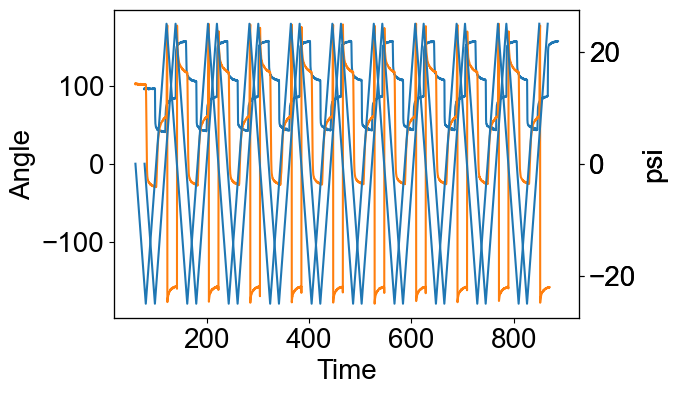

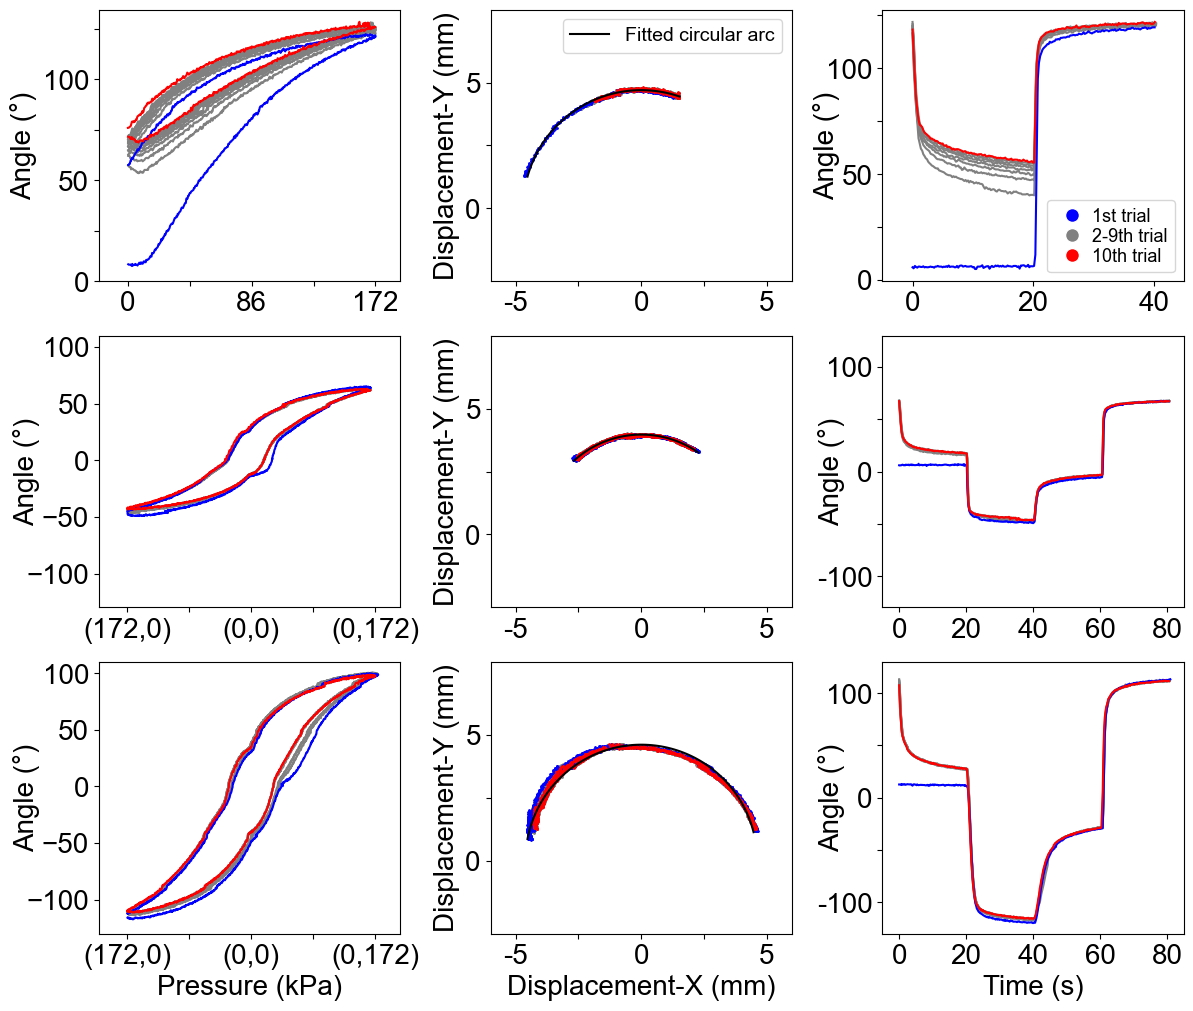

In [13]:
fig, ax_ori = plt.subplots(1, 1, figsize=(6,4))
# fig, ax_angle = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True, gridspec_kw={'wspace': 0.06})
lines = []
for ii, (values_dict, times_dict, camera_dict, camera_data_dict, camera_scale) in enumerate(zip(values_dict_arr, times_dict_arr, camera_dict_arr, camera_data_dict_arr, camera_scale_arr)):
    n_cycle = n_cycle_arr[ii]
    r_val = merge_PWM(values_dict['regulator_PWM2'], values_dict['regulator_PWM3'])
    r_time = times_dict['regulator_PWM2']
    
    ax = ax_ori
    # ax.scatter(camera_data_dict['t'][1], camera_data_dict['rot'][1], s=0.1)
    ax.plot(camera_data_dict['t'][1], camera_data_dict['angle_wrt_fixed'][1], linestyle='-')
    ax.set_xlabel('Time')
    ax.set_ylabel('Angle')
    ax1 = ax.twinx()
    ax1.plot(r_time, r_val)
    ax1.set_ylabel('psi')
    
    cycle_len = prep_cycle(n_cycle, camera_data_dict, r_val, r_time)
    
    ax = ax_all[ii+1][2]
    # ax1 = axes[1]
    legend_labels = []
    camera_data_dict['angle_wrt_fixed'][1][camera_data_dict['angle_wrt_fixed'][1] < -120] += 360
    
    for i in list(range(1, n_cycle-2))+[0, n_cycle-2] :
        if i == 0:
            color = 'blue'
        elif i == n_cycle-2:
            color = 'red'
        else:
            color = 'grey'
        start_idx = camera_data_dict['cycle_start_idx'][1][i]
        end_idx = camera_data_dict['cycle_start_idx'][1][i+1]

        
        # if i != 1:
        #     continue
        cur_t = camera_data_dict['t'][1][start_idx:end_idx] -camera_data_dict['t'][1][start_idx]
        cur_angle = camera_data_dict['angle_wrt_fixed'][1][start_idx:end_idx]-90
        lines.append(ax.plot(cur_t, 
                cur_angle, 
                linestyle='-',
                label=f'Trial {i+1}',
                color=color
                ))
    
subtitles = ['Single pouch', 'Double pouch']
for i, ax in enumerate([ax_all[1][2],ax_all[2][2]]):
    # ax.set_ylim(-130, 50)
    # ax.set_yticks([-100, -50, 0, 50])

    ax.set_xlim(-5, 85)
    ax.set_xticks([0, 20, 40, 60,80])

    ax.set_ylim(-130, 130)
    ax.set_yticks([-100, -50, 0, 50,100])
    ax.set_yticklabels(['-100', '', '0','', '100'])

    # ax.set_title(subtitles[i], fontsize=fontsize_main)
    # ax.text(0.03, 0.97,f'Middle = {psi[i]} psi', transform=ax.transAxes, verticalalignment='top',  bbox=dict(facecolor='white', edgecolor='none', alpha=0.5))

    ax.set_ylabel('Angle (°)',labelpad=-20)
    if i == 1:
        ax.set_xlabel('Time (s)')
    # if i == 1:
    #     legend_labels = [r'1st trial', r'2-9th trial', '10th trial']
    #     legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lines[i][0].get_color(), markersize=10) for i in [-2, -3, -1]]
    #     legend = ax.legend(legend_handles, legend_labels, ncol=1, 
    #                        labelspacing=0.1, 
    #                        columnspacing =0.05,
    #                        loc='lower right', 
    #                        handletextpad=0.1, 
    #                        fontsize=fontsize_legend-1
    #                       )

  
fig_all.savefig(os.path.join(figures_dir, 'char-all-actuators.pdf'), dpi=600, bbox_inches = 'tight')
plt.show()
display(fig_all)